**Contents**: graphs, correlations, chi-square tests and more functions for data cleaning.

**Graphs used in the previous lab:**<br> 
(Some of the definitions refered from the CS105 lectures notes by Professor Strzheletska)<br> 

Histogram: Frequency distribution of a variable.<br>
Bar graph: Any numeric value of a categorical or loosely-ordered variable.<br>
Stacked bar plot: Conditional distribution <br>
Heatmaps: joint distribution <br>
pie plots: Illustrate numeric proportions.<br>

**Today we will cover some new graphs!**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Scatter plot**<br>
To observe and show relationships between two numeric variables.<br>
Helpful in identification of the correlation relationships.


In [28]:
df = pd.DataFrame({'Weight':[33,36,34,40,32,37,35], 'AgeM': [48,64,53,70,44,66,59], 'Baby Teeth':[19,12,18,5,20,10,15], "Eye Color":[1,3,2,2,3,1,2] })
df.head()

,Weight,AgeM,Baby Teeth,Eye Color
0,33,48,19,1
1,36,64,12,3
2,34,53,18,2
3,40,70,5,2
4,32,44,20,3


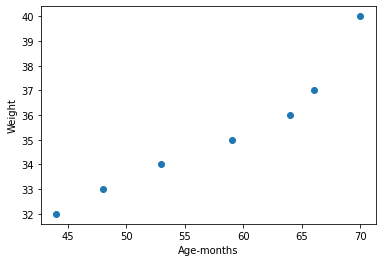

In [29]:
# use scatter graph to check the relationship between AgeM and Weight.
plt.scatter(df.AgeM,df.Weight)
plt.xlabel("Age-months")
plt.ylabel("Weight")
plt.show()

**Directly calculate the Pearson's correlations of variables**:

In [30]:
# calculate the pearson's correlation between two variables
df.Weight.corr(df.AgeM, method = 'pearson')
# df.AgeM.corr(df.Weight, method = 'pearson')

0.9544913454946771

In [31]:
# calculate the pairwise pearson's correlation of multiple columns
r = df.corr()
r

,Weight,AgeM,Baby Teeth,Eye Color
Weight,1.000000,0.954491,-0.990381,-0.151744
AgeM,0.954491,1.000000,-0.958188,-0.126163
Baby Teeth,-0.990381,-0.958188,1.000000,0.112160
Eye Color,-0.151744,-0.126163,0.112160,1.000000


**Use the heatmap to show the correlations**

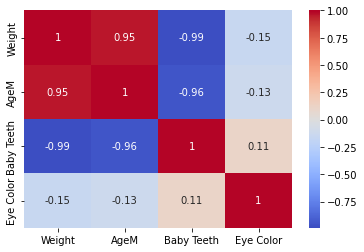

In [32]:
# use the heatmap to show the correlations
import seaborn as sns
# parameter "center" indicate the value at which to center the colormap when plotting divergant data.
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(r, center= 0, cmap = "coolwarm",annot= True)
plt.show()

**Boxplots**<br> 
Can display the distribution of a variable based on the five-number summary: the minimum, the maximum, the sample **median**, and the first and third quartiles.<br>

In [33]:
box_df = pd.DataFrame({'score_a': [1,2,3,4,5,6,7,8,9]})
box_df

,score_a
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


**median (Q2/50th Percentile)**: the middle-point of the ordered data.<br> 
**first quartile (Q1/25th Percentile)**: the middle-point from the minimum to the median. 25% data fall below this value.<br> 
**third quartile (Q3/75th Percentile)**: the middle-point from the median to the maximum. 75% data fall below this value.<br> 
**interquartile range (IQR)**: Q3 - Q1.<br> 
**maximum** and **minimum** <br> 
The data point larger than Q3+1.5IQR, or smaller than Q1-1.5IQR will be considered as the outlier.<br>
**boxplot can also identify the outliners of a dataset.**

<AxesSubplot:>

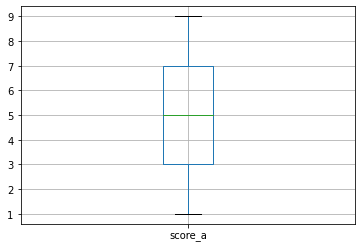

In [34]:
# box_df.boxplot()
box_df.boxplot(column= ["score_a"])

In [35]:
# go back the previous example.
df.head()

,Weight,AgeM,Baby Teeth,Eye Color
0,33,48,19,1
1,36,64,12,3
2,34,53,18,2
3,40,70,5,2
4,32,44,20,3


<AxesSubplot:>

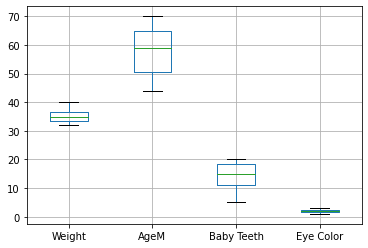

In [36]:
df.boxplot()

**Is boxplot good for purely categoricial data?**

**Violin plot**<br> 
Very similar to the boxplot, but it can also estimate the probability distribution of the variable. When you have more samples, Violin can show more information than the box plot. 

<AxesSubplot:xlabel='Weight'>

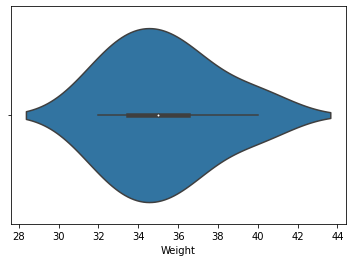

In [37]:
sns.violinplot(x = df["Weight"])

**waterfall chart**<br> 
show how a starting value of something (say, a beginning monthly balance in a checking account) becomes a final value (such as the balance in the account at the end of the month) through a series of intermediate additions and subtractions.
(refer from https://msktc.org/lib/docs/KT_Toolkit/Charts_and_Graphs/Charts_Waterfall_Charts_508c.pdf)

In [38]:
# pip install waterfallcharts

In [39]:
import waterfall_chart

In [40]:
# example from https://github.com/chrispaulca/waterfall
x = pd.DataFrame({"Categories": ['sales','returns','credit fees','rebates','late charges','shipping'], 
                   "Amount": [10,-30,-7.5,-25,95,-7]})
x

,Categories,Amount
0,sales,10.0
1,returns,-30.0
2,credit fees,-7.5
3,rebates,-25.0
4,late charges,95.0
5,shipping,-7.0


c:\Users\thoma\CS105\Lab5_6\lab56\lib\site-packages\waterfall_chart.py:66: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  trans.loc[net_label]= total


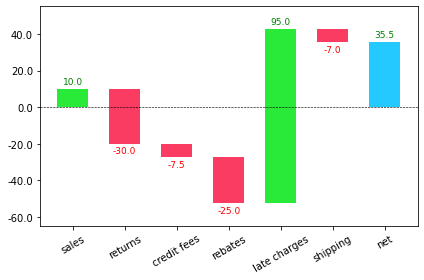

In [41]:
my_plot = waterfall_chart.plot(x["Categories"], x["Amount"])

**Chi-Square Test**<br> 
We can use this test to check if two variables are independent or not.

In [42]:
# The example is taken from the cs105 class. We want to check if the ?? and ?? is independent or not.
data = pd.DataFrame({'male':[250,50], 'female': [200,1000]},index=["frction","non_fiction"])
data

,male,female
frction,250,200
non_fiction,50,1000


In [43]:
# calculate the chi-square value of the dataset
from scipy.stats import chi2_contingency
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
chi, p, dfree, expected = chi2_contingency(data)
print("calculated chi square value: " ,chi)
# print("degree of freedom: ", dfree)


calculated chi square value:  504.76686507936506


In [44]:
# get the threshold to reject the hypothesis by certain significance value and the degree of the freedom.
from scipy.stats import chi2
print("for 1 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.001 significance level:")
chi2.ppf(1-0.001, 1)

for 1 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.001 significance level:


10.827566170662733

**More functions about the data cleaning**

In [45]:
scores = pd.DataFrame({'score1':['good','fair','bad','fair'],'score2':['bad','good','bad','fair'],'score3':['bad','fair','good','fair']})
scores

,score1,score2,score3
0,good,bad,bad
1,fair,good,fair
2,bad,bad,good
3,fair,fair,fair


**Directly replace labels with numeric values**

In [46]:
scores = scores.replace({"score1":{'good': 2, 'fair': 1, 'bad':0}})
display(scores)
# scores.dtypes

# we don't use column.str.replace here!!
# scores["score1"].str.replace("good","0")


,score1,score2,score3
0,2,bad,bad
1,1,good,fair
2,0,bad,good
3,1,fair,fair


**Use bitwise orperators to select rows**<br>
'&': Returns 1 if both the bits are 1 else 0;<br>
'|': Returns 1 if either of the bit is 1 else 0;<br>
'~':Returns one’s complement of the number.<br>

In [47]:
# If neither score2 nor score3 returns a bad score for that student, 
# the student pass the exams, we return true for that student.

scores["pass"] = scores['score2'].isin(["good","fair"]) & scores['score3'].isin(["good","fair"])
# display(~(scores['score2'].isin(["bad"])))
scores

,score1,score2,score3,pass
0,2,bad,bad,False
1,1,good,fair,True
2,0,bad,good,False
3,1,fair,fair,True


In [48]:
# If score2 or score3 dosen't returns a bad score, the student pass the exams, we return true for that student.
scores["pass2"] = scores['score2'].isin(["good","fair"]) | scores['score3'].isin(["good","fair"])
scores

,score1,score2,score3,pass,pass2
0,2,bad,bad,False,False
1,1,good,fair,True,True
2,0,bad,good,False,True
3,1,fair,fair,True,True
